<a href="https://colab.research.google.com/github/pavan-potnuru/hotel-booking-analysis-team-repository/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [82]:
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


ModuleNotFoundError: ignored

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Copy of Hotel Bookings.csv')

**Data Inspection**

In [5]:
# First look
dataset.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# **DataSet Information:**
 
 hotel : Type of he hotel (Categorical)
 
 is_canceled : whether booking is canceled 0 - not canceled 1-canceled(Categorical)

lead_time : the number of days between the time a guest books their room and the time they are scheduled to arrive at the hotel.(Numerical)

arrival_date_year : year of Arravial (Numerical)

arrival_date_month : month of arravial (Categorical)

arrival_date_week_number : Week of arravail (Numerical)

arrival_date_day_of_month : Arravial day (Nummerical)

stays_in_weekend_nights : no of weekend nights during the stay (Numerical)

stays_in_week_nights : no of night stays in week days (Numerical)

adults : number of adults (Numerical)

children : number of Childeren (Numerical)

babies : number of babies (Numerical)

meal : Type of meal (categorical)

country : Country of customer (Categorical)

market_segment : Means through wich hotel got booking (Categorical)

distribution_channel :  Means through wich hotel got booking (Categorical)

is_repeated_guest : whether the guest is repated 0-not repeated 1 -repeatd (categorical)

previous_cancellations : number of canceletions done by customer previously (categorical)

previous_bookings_not_canceled : number of bookings compeleted without canceletion (Numerical)

reserved_room_type : reserved type of room (Categorical)

assigned_room_type : type of room assigned (Categorical)

booking_changes : canges made to booking (Numerical)

deposit_type : type of deposit (categorical)

agent : ID of agent (Categorical)

company : ID of company (categorical)

days_in_waiting_list : no of days to wait (Numerical)

customer_type : type of customer (Categorical)

required_car_parking_spaces : Number of parking spaces required (Numerical)

total_of_special_requests : special request made by customer (Numberical)

reservation_status : Status of reservation (Categorical)

reservation_status_date : Date of reservation (Date)

adr : average daily rate (Numerical)




In [7]:
#creating a copy of data
new_df = dataset.copy()

# **Data Cleaning**

Data cleaning is an importent part of EDA, in data cleaning we perform operations like

 1) Removing Duplicates

 2) Handling missing values

 3) Handling Features (i.e, Merging similar columns, removing irrelavant columns and correting the data types)

**1.Removing Duplicates**

In [8]:
# Show no. of rows of duplicate rows duplicate rows
new_df[new_df.duplicated()].shape   

(31994, 32)

In [9]:
# Removing duplicate values
new_df.drop_duplicates(inplace = True)

In [10]:
#checking for duplicates
new_df[new_df.duplicated()].shape

(0, 32)

In [11]:
# number of obeservations after removing duplicates
new_df.shape

(87396, 32)

**2.Handling missing values**

In [12]:
# null value count in each colum
new_df.isnull().sum().sort_values()

hotel                                 0
total_of_special_requests             0
required_car_parking_spaces           0
adr                                   0
customer_type                         0
days_in_waiting_list                  0
deposit_type                          0
booking_changes                       0
assigned_room_type                    0
reserved_room_type                    0
previous_bookings_not_canceled        0
previous_cancellations                0
is_repeated_guest                     0
reservation_status                    0
distribution_channel                  0
reservation_status_date               0
meal                                  0
babies                                0
adults                                0
stays_in_week_nights                  0
stays_in_weekend_nights               0
arrival_date_day_of_month             0
market_segment                        0
is_canceled                           0
arrival_date_week_number              0


from above we can see that only four columns( children, country, agent and company) have missing values.

In [13]:
new_df[['company','agent']] = new_df[['company','agent']].fillna(0)

Since agent and company are booking mediums for customers there is a chance that customer can book directly without any medium. So we can replace the null values with 0.

In [14]:
new_df['country'] = new_df['country'].fillna('others')

We have 452 null values in country column, so we can fill these with 'others'

In [15]:
new_df['children'] = new_df['children'].fillna(0)

We can replace the null values in childern column with 0, since there is a high chance for customers having zero childern might be missing to fill the column 

In [16]:
#checking all the missing values were removed
new_df.isnull().sum().sort_values()

hotel                             0
total_of_special_requests         0
required_car_parking_spaces       0
adr                               0
customer_type                     0
days_in_waiting_list              0
company                           0
agent                             0
deposit_type                      0
booking_changes                   0
assigned_room_type                0
reserved_room_type                0
previous_bookings_not_canceled    0
previous_cancellations            0
is_repeated_guest                 0
distribution_channel              0
market_segment                    0
country                           0
meal                              0
babies                            0
children                          0
adults                            0
stays_in_week_nights              0
stays_in_weekend_nights           0
arrival_date_day_of_month         0
arrival_date_week_number          0
arrival_date_month                0
arrival_date_year           

There are some rows where adult,children and babies column has 0 in it. We can remove those row for which these three column have 0 as value simultaneously.

In [17]:
#checking how many rows have adult, childern and babies as 0
new_df[new_df['adults']+new_df['children']+new_df['babies'] == 0].shape

(166, 32)

In [18]:
# we have 166 rows with 0 values so we can drop these rows
new_df.drop(new_df[new_df['adults']+new_df['children']+new_df['babies'] == 0].index,inplace=True)

**3.Features Handling**

In [19]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87230 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87230 non-null  object 
 1   is_canceled                     87230 non-null  int64  
 2   lead_time                       87230 non-null  int64  
 3   arrival_date_year               87230 non-null  int64  
 4   arrival_date_month              87230 non-null  object 
 5   arrival_date_week_number        87230 non-null  int64  
 6   arrival_date_day_of_month       87230 non-null  int64  
 7   stays_in_weekend_nights         87230 non-null  int64  
 8   stays_in_week_nights            87230 non-null  int64  
 9   adults                          87230 non-null  int64  
 10  children                        87230 non-null  float64
 11  babies                          87230 non-null  int64  
 12  meal                           

In [20]:
new_df[['market_segment','distribution_channel']].value_counts()

market_segment  distribution_channel
Online TA       TA/TO                   51254
Offline TA/TO   TA/TO                   13700
Direct          Direct                  11467
Corporate       Corporate                3893
Groups          TA/TO                    3606
                Corporate                 665
                Direct                    651
Complementary   Direct                    539
Direct          TA/TO                     229
Aviation        Corporate                 216
Corporate       TA/TO                     154
                Direct                    153
Online TA       GDS                       136
                Direct                    128
Offline TA/TO   Corporate                  95
Direct          Corporate                  81
Complementary   Corporate                  78
                TA/TO                      75
Offline TA/TO   GDS                        44
Online TA       Corporate                  34
Offline TA/TO   Direct                     

From above we can see that, even though market_segment and distribution_channel looks similar but there sub categories in each market_segment. So we cannot merge or remove any one of these two columns.

We can create a new colums for total number of night stays by adding stays_in_weekend_nights and stays_in_week_nights as total_night_stays

In [21]:
#creating new column for total night stays
new_df['total_night_stays'] = new_df['stays_in_week_nights']+new_df['stays_in_weekend_nights']

In [74]:
lead_time_months =new_df['lead_time'] // 30
lead_time_months.value_counts() / len(new_df)
new_df['lead_time_month'] = new_df['lead_time'] // 30


In [83]:
def cancellation(row):
    if (row['previous_cancellations'] == 0):
        return 0
    else :
        return 1

new_df['is_previously_cancelled'] = new_df.apply(cancellation, axis = 1)


In [53]:
#creating new column for total night stays
new_df['kids'] = new_df['babies']+new_df['children']

In [22]:
#creating new column for total number of people
new_df['total_people'] = new_df['babies']+new_df['children']+new_df['adults']

In [23]:
#changing data type from float to integer
new_df[['children', 'company', 'agent','total_people']] = new_df[['children', 'company', 'agent','total_people']].astype('int64')

In [24]:
#changing to date type from string
new_df['reservation_status_date'] = pd.to_datetime(new_df['reservation_status_date'], format = '%Y-%m-%d')

# **Exploratory Data Analysis**

In [25]:
def plot(x, y, x_label=None,y_label=None, title=None, figsize=(7,5), type='bar'):
    
    '''
    INPUT:
        x:        Array containing values for x-axis
        y:        Array containing values for y-axis
        x_lable:  String value for x-axis label
        y_lable:  String value for y-axis label
        title:    String value for plot title
        figsize:  tuple value, for figure size
        type:     type of plot (default is bar plot)
        
    OUTPUT:
        Display the plot
    '''
    
    sns.set_style('darkgrid')
    
    fig, ax = plt.subplots(figsize=figsize)
    
    if x_label != None:
        ax.set_xlabel(x_label)
    
    if y_label != None:
        ax.set_ylabel(y_label)
        
    if title != None:
        ax.set_title(title)
    
    if type == 'bar':
        sns.barplot(x,y, ax = ax)
    elif type == 'line':
        sns.lineplot(x,y, ax = ax)
        
    
    plt.show()

**Univariate Analysis**

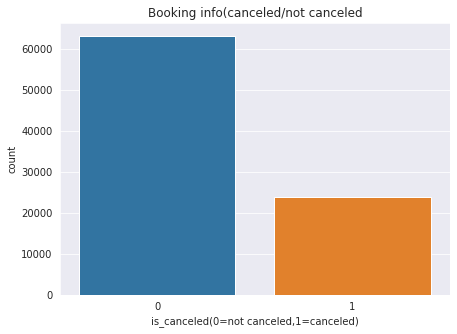

Percentage of conformed bookings 72.48 
Percentage of Canceled bookings 27.52


In [26]:
# is_canceled
df1 = new_df['is_canceled']
df1 = df1.value_counts()
x=df1.index.values
y=df1.values
plot(x,y,x_label='is_canceled(0=not canceled,1=canceled)',y_label='count',title='Booking info(canceled/not canceled',figsize=(7,5),type='bar')
no_of_confirmed_bookings = df1[0]
no_of_canceled_bookings = df1[1]
count_of_bookings = no_of_canceled_bookings+no_of_confirmed_bookings
print(f'Percentage of conformed bookings {round((no_of_confirmed_bookings/count_of_bookings)*100,2)} \nPercentage of Canceled bookings {round((no_of_canceled_bookings/count_of_bookings)*100,2)}')

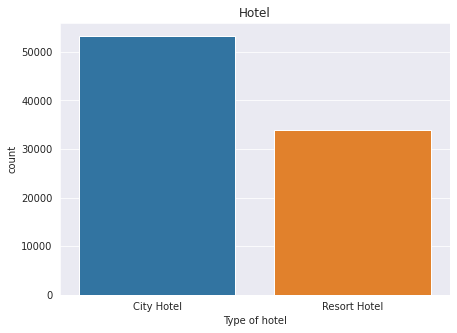

city_hotel =61.073025335320416, resort_hotel = 38.926974664679584


In [27]:
#Hotel
df1=new_df['hotel']
df1=df1.value_counts()
x=df1.index.values
y=df1.values
plot(x,y,x_label='Type of hotel',y_label='count',title='Hotel')

city_hotel=df1[0]
resort_hotel=df1[1]
sum=city_hotel+resort_hotel
print('city_hotel =' + str(city_hotel/sum*100) + ', resort_hotel = '+ str(resort_hotel/sum*100))

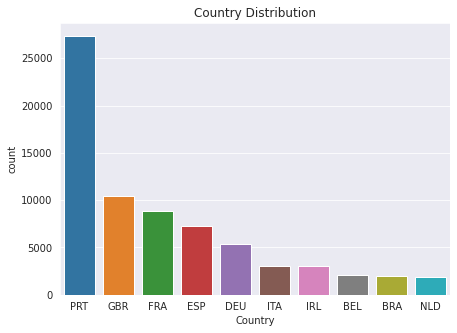

In [28]:
#Country
df1=new_df['country']
df1=df1.value_counts()[:10]
x=df1.index.values
y=df1.values
plot(x,y,x_label='Country',y_label='count',title='Country Distribution')

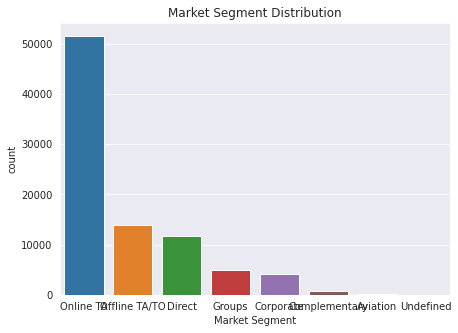

In [29]:
#Market Segment
df1=new_df['market_segment']
df1=df1.value_counts()
x=df1.index.values
y=df1.values
plot(x,y,x_label='Market Segment',y_label='count',title='Market Segment Distribution')

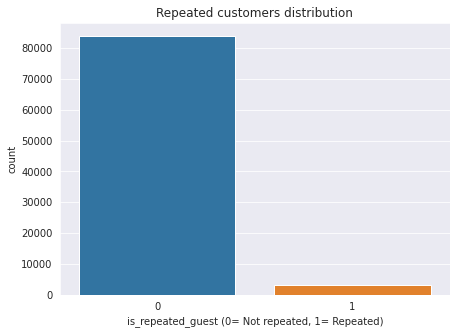

In [30]:
#is_repeated
df1=new_df['is_repeated_guest']
df1=df1.value_counts()
x=df1.index.values
y=df1.values
plot(x,y,x_label='is_repeated_guest (0= Not repeated, 1= Repeated)',y_label='count',title='Repeated customers distribution')

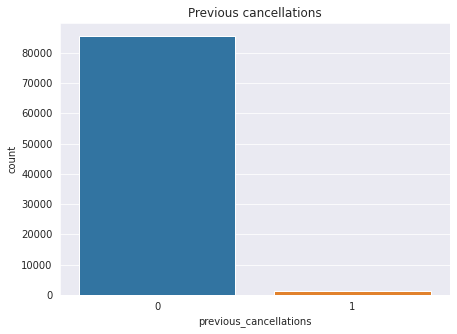

In [31]:
#previous_cancellations
df1=new_df['previous_cancellations']
df1=df1.value_counts()[:2]
x=df1.index.values
y=df1.values
plot(x,y,x_label='previous_cancellations',y_label='count',title='Previous cancellations')

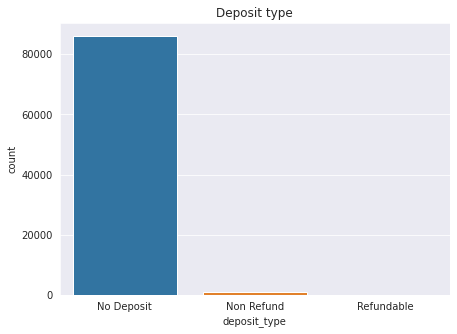

In [32]:
#deposit_type
df1=new_df['deposit_type']
df1=df1.value_counts()
x=df1.index.values
y=df1.values
plot(x,y,x_label='deposit_type',y_label='count',title='Deposit type')

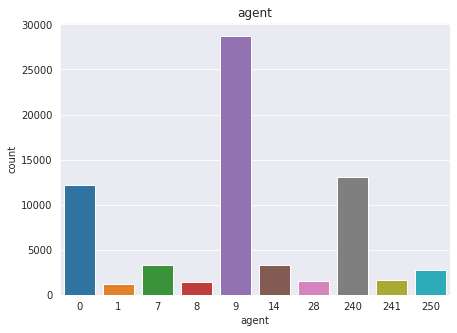

In [33]:
df1=new_df['agent']
df1=df1.value_counts()[:10]
x=df1.index.values
y=df1.values
plot(x,y,x_label='agent',y_label='count',title='agent')

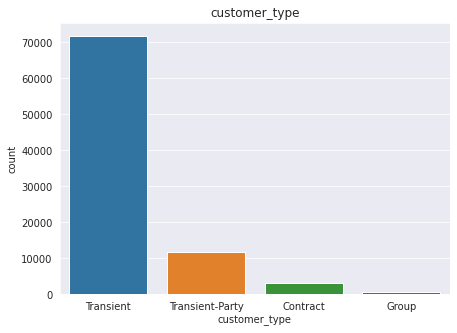

In [34]:
#customer_type
df1=new_df['customer_type']
df1=df1.value_counts()[:10]
x=df1.index.values
y=df1.values
plot(x,y,x_label='customer_type',y_label='count',title='customer_type')

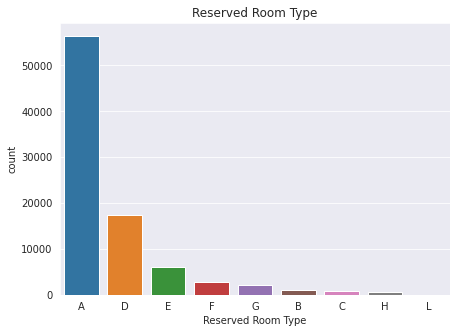

In [35]:
#reserved_room_type
df1=new_df['reserved_room_type']
df1=df1.value_counts()
x=df1.index.values
y=df1.values
plot(x,y,x_label='Reserved Room Type',y_label='count',title='Reserved Room Type')

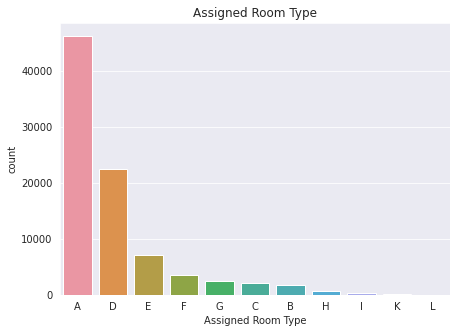

In [36]:
#assigned_room_type
df1=new_df['assigned_room_type']
df1=df1.value_counts()
x=df1.index.values
y=df1.values
plot(x,y,x_label='Assigned Room Type',y_label='count',title='Assigned Room Type')

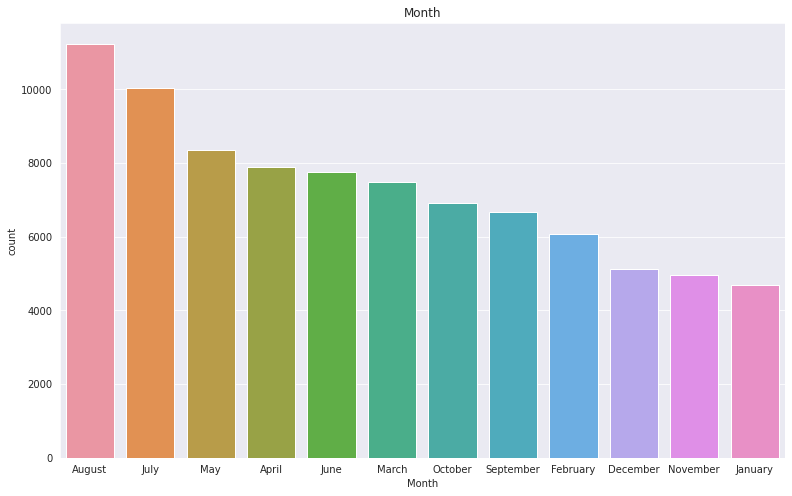

In [37]:
#arrival_date_month
df1=new_df['arrival_date_month']
df1=df1.value_counts()
x=df1.index.values
y=df1.values
plot(x,y,x_label='Month',y_label='count',figsize=(13,8),title='Month')

**Bi-Varient Analysis**
With Cancellation data

              total_cancelled_bookings  total_bookings  cancel_%
hotel                                                           
City Hotel                       16035           53274     30.10
Resort Hotel                      7974           33956     23.48


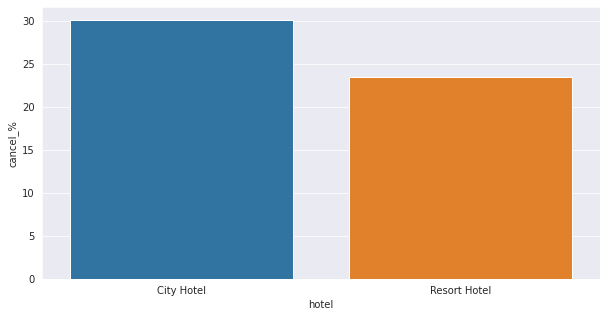

In [38]:
 #Hotel
 # Selecting and counting number of cancelled bookings for each hotel.
cancelled_data = new_df[new_df['is_canceled'] == 1]
cancel_grp = cancelled_data.groupby('hotel')
D1 = pd.DataFrame(cancel_grp.size()).rename(columns = {0:'total_cancelled_bookings'})

# Counting total number of bookings for each type of hotel
grouped_by_hotel = new_df.groupby('hotel')
total_booking = grouped_by_hotel.size()
D2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
D3 = pd.concat([D1,D2], axis = 1)

# Calculating cancel percentage 
D3['cancel_%'] = round((D3['total_cancelled_bookings']/D3['total_bookings'])*100,2)
print(D3)

plt.figure(figsize = (10,5))
ax = sns.barplot(x = D3.index, y = D3['cancel_%'])
plt.show()


                    total_cancelled_bookings  total_bookings  cancel_%
arrival_date_month                                                    
April                                   2406            7900     30.46
August                                  3622           11242     32.22
December                                1377            5112     26.94
February                                1412            6083     23.21
January                                 1037            4685     22.13
July                                    3196           10043     31.82
June                                    2353            7756     30.34
March                                   1829            7489     24.42
May                                     2442            8344     29.27
November                                1052            4973     21.15
October                                 1642            6921     23.72
September                               1641            6682     24.56


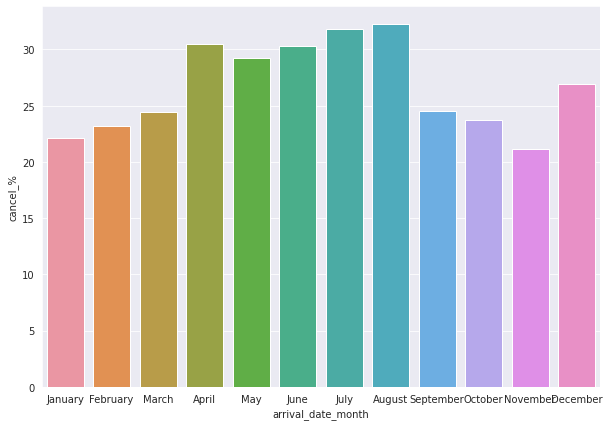

                    total_confirmed_bookings  total_bookings  confirmed_%
arrival_date_month                                                       
April                                   5494            7900        69.54
August                                  7620           11242        67.78
December                                3735            5112        73.06
February                                4671            6083        76.79
January                                 3648            4685        77.87
July                                    6847           10043        68.18
June                                    5403            7756        69.66
March                                   5660            7489        75.58
May                                     5902            8344        70.73
November                                3921            4973        78.85
October                                 5279            6921        76.28
September                             

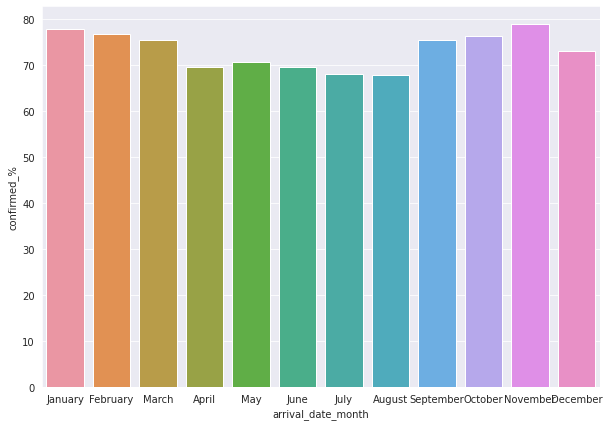

In [40]:
# arrival_month
 # Selecting and counting number of cancelled bookings for each hotel.
cancelled_data = new_df[new_df['is_canceled'] == 1]
cancel_grp = cancelled_data.groupby('arrival_date_month')
D1 = pd.DataFrame(cancel_grp.size()).rename(columns = {0:'total_cancelled_bookings'})

# Counting total number of bookings for each type of hotel
grouped_by_hotel = new_df.groupby('arrival_date_month')
total_booking = grouped_by_hotel.size()
D2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
D3 = pd.concat([D1,D2], axis = 1)

# Calculating cancel percentage 
D3['cancel_%'] = round((D3['total_cancelled_bookings']/D3['total_bookings'])*100,2)
print(D3)

plt.figure(figsize = (10,7))
sns.barplot(x = D3.index, y = D3['cancel_%'],order=['January','February','March','April','May','June','July','August','September','October','November','December'])
plt.show()

 # Selecting and counting number of cancelled bookings for each hotel.
cancelled_data = new_df[new_df['is_canceled'] == 0]
cancel_grp = cancelled_data.groupby('arrival_date_month')
D1 = pd.DataFrame(cancel_grp.size()).rename(columns = {0:'total_confirmed_bookings'})

# Counting total number of bookings for each type of hotel
grouped_by_hotel = new_df.groupby('arrival_date_month')
total_booking = grouped_by_hotel.size()
D2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
D3 = pd.concat([D1,D2], axis = 1)

# Calculating cancel percentage 
D3['confirmed_%'] = round((D3['total_confirmed_bookings']/D3['total_bookings'])*100,2)
print(D3)

plt.figure(figsize = (10,7))
sns.barplot(x = D3.index, y = D3['confirmed_%'],order=['January','February','March','April','May','June','July','August','September','October','November','December'])
plt.show()

                total_cancelled_bookings  total_bookings  \
market_segment                                             
Aviation                              45             226   
Complementary                         85             692   
Corporate                            509            4200   
Direct                              1737           11780   
Groups                              1332            4922   
Offline TA/TO                       2057           13855   
Online TA                          18242           51553   
Undefined                              2               2   

                total_confirmed_bookings  cancel_%  confirmed_%  
market_segment                                                   
Aviation                           181.0     19.91        80.09  
Complementary                      607.0     12.28        87.72  
Corporate                         3691.0     12.12        87.88  
Direct                           10043.0     14.75        85.25  
Gro

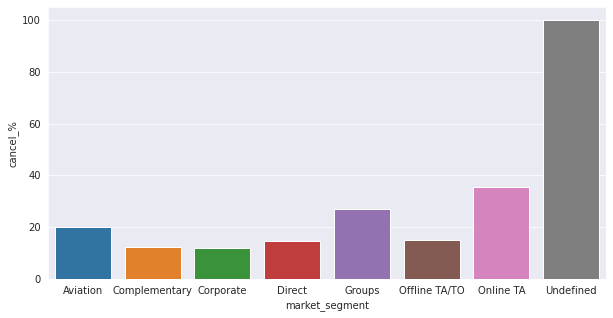

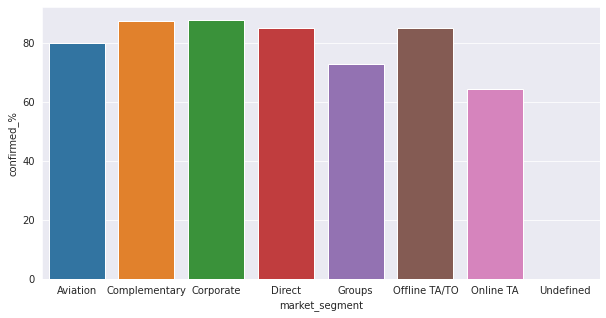

In [52]:
# market_segment
# Selecting and counting number of cancelled bookings.
cancelled_data = new_df[new_df['is_canceled'] == 1]
cancel_grp = cancelled_data.groupby('market_segment')
D1 = pd.DataFrame(cancel_grp.size()).rename(columns = {0:'total_cancelled_bookings'})

# Selecting and counting number of confirmed bookings.
confirmed_data = new_df[new_df['is_canceled'] == 0]
confirmed_grp = confirmed_data.groupby('market_segment')
D4 = pd.DataFrame(confirmed_grp.size()).rename(columns = {0:'total_confirmed_bookings'})

# Counting total number of bookings for each type of hotel
grouped_by_hotel = new_df.groupby('market_segment')
total_booking = grouped_by_hotel.size()
D2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
D3 = pd.concat([D1,D2,D4], axis = 1)

# Calculating cancel percentage 
D3['cancel_%'] = round((D3['total_cancelled_bookings']/D3['total_bookings'])*100,2)


# Calculating confirned percentage 
D3['confirmed_%'] = round((D3['total_confirmed_bookings']/D3['total_bookings'])*100,2)
print(D3)

plt.figure(figsize = (10,5))
ax = sns.barplot(x = D3.index, y = D3['cancel_%'])
plt.show()

plt.figure(figsize = (10,5))
ax = sns.barplot(x = D3.index, y = D3['confirmed_%'])
plt.show()

              total_cancelled_bookings  total_bookings  cancel_%
deposit_type                                                    
No Deposit                       23000           86085     26.72
Non Refund                         983            1038     94.70
Refundable                          26             107     24.30


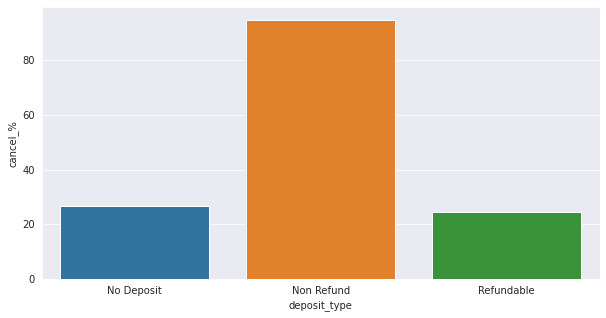

In [54]:
#deposit_type
 # Selecting and counting number of cancelled bookings for each hotel.
cancelled_data = new_df[new_df['is_canceled'] == 1]
cancel_grp = cancelled_data.groupby('deposit_type')
D1 = pd.DataFrame(cancel_grp.size()).rename(columns = {0:'total_cancelled_bookings'})

# Counting total number of bookings for each type of hotel
grouped_by_hotel = new_df.groupby('deposit_type')
total_booking = grouped_by_hotel.size()
D2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
D3 = pd.concat([D1,D2], axis = 1)

# Calculating cancel percentage 
D3['cancel_%'] = round((D3['total_cancelled_bookings']/D3['total_bookings'])*100,2)
print(D3)

plt.figure(figsize = (10,5))
ax = sns.barplot(x = D3.index, y = D3['cancel_%'])
plt.show()

                 total_cancelled_bookings  total_bookings  cancel_%
lead_time_month                                                    
0                                  5510.0           33995     16.21
1                                  4252.0           13503     31.49
2                                  3126.0            9484     32.96
3                                  2501.0            7286     34.33
4                                  2050.0            5733     35.76
5                                  1837.0            5296     34.69
6                                  1394.0            3800     36.68
7                                   990.0            2765     35.80
8                                   742.0            1744     42.55
9                                   540.0            1308     41.28
10                                  492.0             992     49.60
11                                  322.0             652     49.39
12                                   70.0       

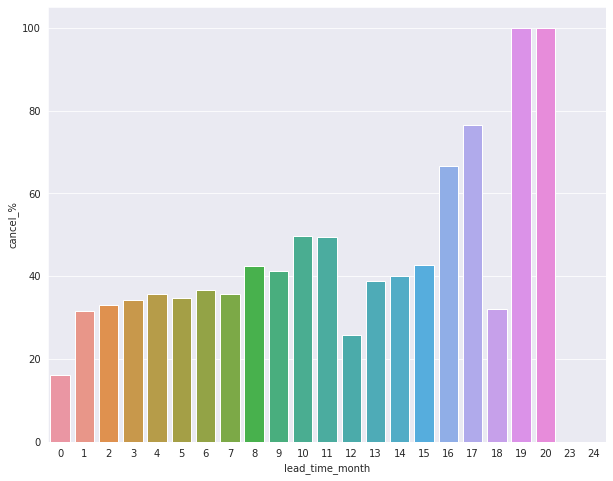

In [77]:
#Lead_time_month
 # Selecting and counting number of cancelled bookings for each hotel.
cancelled_data = new_df[new_df['is_canceled'] == 1]
cancel_grp = cancelled_data.groupby('lead_time_month')
D1 = pd.DataFrame(cancel_grp.size()).rename(columns = {0:'total_cancelled_bookings'})

# Counting total number of bookings for each type of hotel
grouped_by_hotel = new_df.groupby('lead_time_month')
total_booking = grouped_by_hotel.size()
D2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
D3 = pd.concat([D1,D2], axis = 1)

# Calculating cancel percentage 
D3['cancel_%'] = round((D3['total_cancelled_bookings']/D3['total_bookings'])*100,2)
print(D3)


plt.figure(figsize = (10,8))
ax = sns.barplot(x = D3.index, y = D3['cancel_%'])
plt.show()

In [ ]:
new_df.info()

                         total_cancelled_bookings  total_bookings  cancel_%
is_previously_cancelled                                                    
0                                           22866           85549     26.73
1                                            1143            1681     68.00


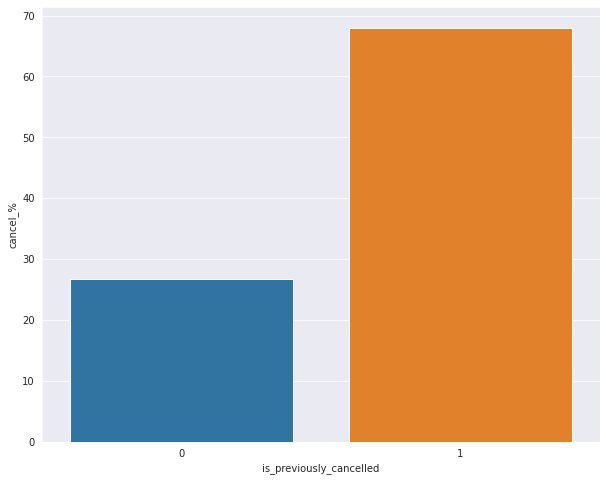

In [85]:
#previous_cancellations
 # Selecting and counting number of cancelled bookings for each hotel.
cancelled_data = new_df[new_df['is_canceled'] == 1]
cancel_grp = cancelled_data.groupby('is_previously_cancelled')
D1 = pd.DataFrame(cancel_grp.size()).rename(columns = {0:'total_cancelled_bookings'})

# Counting total number of bookings for each type of hotel
grouped_by_hotel = new_df.groupby('is_previously_cancelled')
total_booking = grouped_by_hotel.size()
D2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
D3 = pd.concat([D1,D2], axis = 1)

# Calculating cancel percentage 
D3['cancel_%'] = round((D3['total_cancelled_bookings']/D3['total_bookings'])*100,2)
print(D3)


plt.figure(figsize = (10,8))
ax = sns.barplot(x = D3.index, y = D3['cancel_%'])
plt.show()